# Monty Hall Simulation

This project explores the **Monty Hall Problem**, a classic probability puzzle that challenges intuitive decision-making. The problem involves a game show scenario where a player selects one of three doors, behind one of which is a car (the prize) and behind the others are goats. After the initial selection, the host, who knows what is behind each door, opens one of the remaining doors to reveal a goat. The player is then given the option to either stick with their original choice or switch to the other unopened door.

Using Python, we will simulate the Monty Hall Problem thousands of times to analyze the outcomes of two strategies: staying with the original choice versus switching. The project aims to compare the probabilities of winning the car under both methods, provide insights into Bayesian reasoning, and demonstrate how statistical intuition can sometimes be misleading. Through this, we aim to validate whether switching doors offers a strategic advantage.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Initialize counters for wins using the "stay" and "switch" strategies
wins_stay = 0
wins_switch = 0

# Lists to track the winning percentages for both strategies over the simulations
winning_pct_stay = []
winning_pct_switch = []

# Number of simulations
num_of_sim = 1000

# Set a random seed for reproducibility
np.random.seed(0)

# Run the simulations
for i in range(num_of_sim):
    # Randomly place the car and two goats behind the three doors
    doors = ["Car", "Goat 1", "Goat 2"]
    np.random.shuffle(doors)
    
    # Player's first random choice of a door
    first_choice = np.random.choice(doors)
    
    # Host opens a door with a goat (not the player's choice and not the car)
    if first_choice == "Goat 1":
        monty_opens = "Goat 2"  # Host opens the remaining goat door
    elif first_choice == "Goat 2":
        monty_opens = "Goat 1"  # Host opens the remaining goat door
    else:  # If the player chose the car, host randomly picks one of the goat doors
        monty_opens = np.random.choice(["Goat 1", "Goat 2"])
        # If the player sticks with their first choice (the car), increment wins for "stay"
        wins_stay += 1
    
    # Calculate and record the winning percentage for the "stay" strategy
    winning_pct_stay.append(wins_stay * 100 / (i + 1))
    
    # Player switches to the remaining unopened door
    second_choice = doors.copy()  # Copy the list of doors
    second_choice.remove(monty_opens)  # Remove the door Monty opened
    second_choice.remove(first_choice)  # Remove the player's first choice
    
    # Check if switching wins the car
    if second_choice == ["Car"]:
        wins_switch += 1
    
    # Calculate and record the winning percentage for the "switch" strategy
    winning_pct_switch.append(wins_switch * 100 / (i + 1))

# Print final probabilities after all simulations
print("Probability of Winning if Stay: {} %".format(wins_stay * 100 / num_of_sim))
print("Probability of Winning if Switch: {} %".format(wins_switch * 100 / num_of_sim))

Probability of Winning if Stay: 34.3 %
Probability of Winning if Switch: 65.7 %


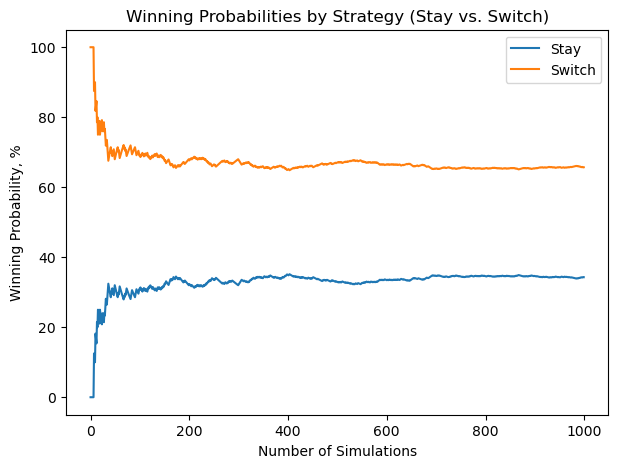

In [3]:
fig = plt.figure(figsize=(7,5))
plt.title("Winning Probabilities by Strategy (Stay vs. Switch)")
plt.xlabel("Number of Simulations")
plt.ylabel("Winning Probability, %")
sns.lineplot(data = winning_pct_stay, label = "Stay")
sns.lineplot(data = winning_pct_switch, label = "Switch");

Thus, the probability of winning by staying with the first choice is **1/3**, but the probability of winning by switching is **2/3**.